<div align="center">

**Lab Report Title**  
*Field Effect Transistor Applications*

**Course:** ELECTRONICS 2 

**Date:** 11/06/2025


**Group Members**

| Full Name                 | Matriculation No. |
| ------------------------- | ----------------- |
| Ashu Nkongho Tekoh        | 2756129           |
| Enes Gjana                | 2770615           |
| Elhama Adel               | 2756781           |


</div>

In [98]:
#Load all Import

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Introduction and Objective

During this soldering exercise, a voltage regulator with an operational amplifier and additional
components is to be assembled on a perforated board in Eurocard format.



# Preparation

## Part 1: Differential Amplifier 
**Objective:** Record transfer characteristics of a differential amplifier, determine the offset voltage and transconductance.

1. **Calculation of the emitter resistance RE for the given OP.**  
   $$RE = \frac{U_B-U_{\rm BE0}}{2*I_{\rm CO}} = \frac{9.35\text{ V}}{2\text{ mA}} = {4675\;\Omega}.$$

2. **Calculation of the Collector resistance RC.**  
   - This was not required in the preperation but the differential amplifier can not work without RC as the circuit provided had no RC.
   - The OP was assumed at $U_{B}$/2.
   $$U_{\rm OUT0} = \frac{U_B}{2} = {5\text{V}}.$$
   $$RC = \frac{U_B-U_{\rm OUT0}}{I_{\rm CO}} = \frac{5\text{ V}}{1\text{ mA}} = {5000\;\Omega}.$$
  
3. **Simulation action (See Calculation under Data Processing)**  
   - Build the differential amplifier circuit in SPICE / LT-Spice. 
   - Perform the DC sweep of $U_{IN1}$ from -0.15V to 0.15V. 
   - Plot $U_{OUT1}$ and $U_{OUT2}$.  
   - Observe the transfer characteristics..  

  
   
   

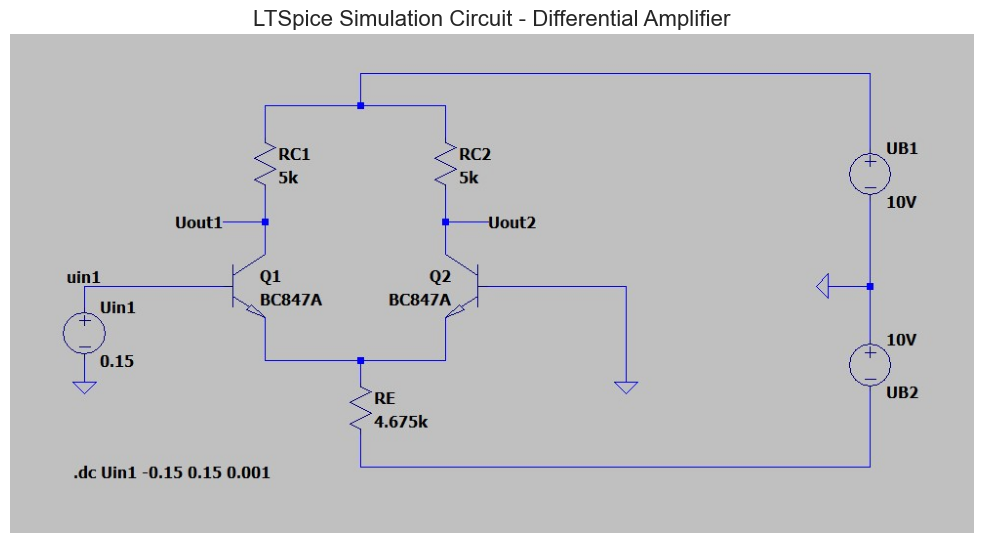

In [99]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LTSPICE_CIRCUIT_AVAILABLE = True
img_path = '../images/lab3_task1.jpg'  # change string to name of LTspice image
img_title = "LTSpice Simulation Circuit - Differential Amplifier" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

In [100]:
from components.data_import import import_measurement_data, import_simulation_data
from components.data_processing import process_sim_data,process_single_csv
import pandas as pd
# Use the code below if we want to read single .csv files
# Pull a .csv and .txt files in the data folder

IS_DATA_AVAILABLE = True
simulation_data_path = "../data/Prep_Data/diffamp_standard_transfer_characteristics.txt" # Enter path to simulation data
part_2_data_path = "../data/Prep_Data/OpAmp741.1.txt" # Enter path to simulation data
simulation_square_wave_data_path = "../data/Prep_Data/OpAmp741_2.txt" # Enter path to simulation square wave data
#oscilloscope_data_path_ch1 = "../data/tek0001CH1.csv" # Enter path to chanel 1 oscilloscope data
#oscilloscope_data_path_ch2 = "../data/tek0001CH2.csv" # Enter path to chanel 2 osilloscope data


cleaned_sim_data = pd.DataFrame()
cleaned_ch1_data = pd.DataFrame()
cleaned_ch2_data = pd.DataFrame()

part_2_data = pd.DataFrame()

if IS_DATA_AVAILABLE:
    sim_data = import_simulation_data(simulation_data_path)
    data_2 = import_simulation_data(part_2_data_path)
    data_3 = import_simulation_data(simulation_square_wave_data_path)
    #ch1_data = import_measurement_data(oscilloscope_data_path_ch1)
    #ch2_data = import_measurement_data(oscilloscope_data_path_ch2)
    
    # Processing the data

    #cleaned_sim_data = process_sim_data (sim_data)
    #part_2_data = process_sim_data (data_2)
    #cleaned_ch1_data = process_single_csv(ch1_data)
    #cleaned_ch2_data =process_single_csv(ch2_data)

[ 12-06-2025, 10:52:56 ] 20 root - INFO - Successfully imported simulation data from ../data/Prep_Data/diffamp_standard_transfer_characteristics.txt


,uin1,V(uout1),V(uout2),abs(D(V(uout1)-V(uout2))/D(uin1))
0,-0.150,9.966732,0.112030,2.573565
1,-0.149,9.965443,0.113314,2.675440
2,-0.148,9.964051,0.114700,2.805822
3,-0.147,9.962631,0.116114,2.890255
4,-0.146,9.961155,0.117584,3.003672


[ 12-06-2025, 10:52:56 ] 20 root - INFO - Successfully imported simulation data from ../data/Prep_Data/OpAmp741.1.txt


,time,V(n002),V(n003)
0,0.000000e+00,0.010916,0.000000
1,1.554017e-07,0.010943,0.000076
2,3.108035e-07,0.011031,0.000151
3,4.662052e-07,0.011180,0.000227
4,6.216070e-07,0.011391,0.000303


[ 12-06-2025, 10:52:56 ] 20 root - INFO - Successfully imported simulation data from ../data/Prep_Data/OpAmp741_2.txt


,time,V(n002),V(n003)
0,0.000000e+00,13.88938,-7.500000
1,9.918213e-12,13.89006,-7.351227
2,1.022339e-11,13.89008,-7.346649
3,1.083374e-11,13.89012,-7.337494
4,1.205444e-11,13.89019,-7.319183


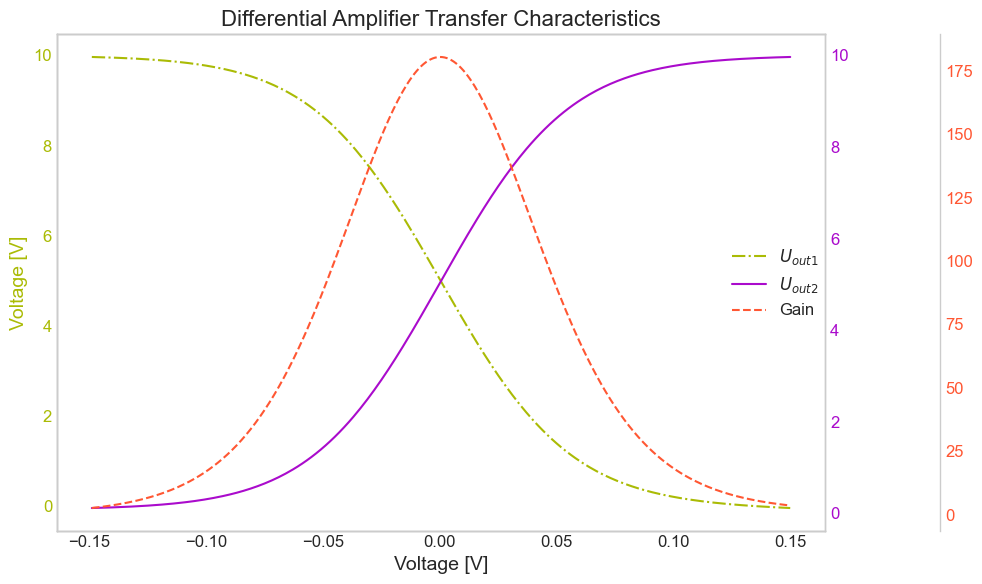

In [101]:
# Plotting multiple data
from components.data_visualizing import plot_multiple_sim_data_2, plot_sim_data

PLOT_MULTI_SIM_DATA = True

if PLOT_MULTI_SIM_DATA:
    fig = plot_multiple_sim_data_2(
        sim_data=sim_data,
        x_label='Voltage [V]',
        y1_label= 'Voltage [V]',	
        title='Differential Amplifier Transfer Characteristics',
        label1='$U_{out1}$',
        label2='$U_{out2}$',
        label3='Gain',
        #is_multi=True
    )

## Task 1.2

**Objective:** calculate the theoritical values of common mode gain and differential mode gain for the modified circuit with RC=1k.

1. **Common mode gain.**  
  Given:
$$R_C = 1\,\text{k}\Omega, \quad R_E = 4.675\,\text{k}\Omega$$
$$A_{CM} = -\frac{1\,\text{k}\Omega}{2 \cdot 4.675\,\text{k}\Omega} = -\frac{1}{9.35} = -0.106$$



2. **Differential mode gain**  
$$A_{DM} = \frac{1}{2}g_m R_C$$
$$g_m = \frac{I_{\rm CO}}{2*V_T}$$

  Given:
$$I_C = 1\,\text{mA}, \quad V_T = 25\,\text{mV}, \quad R_C = 1\,\text{k}\Omega$$

$$g_m = \frac{1\,\text{mA}}{50\,\text{mV}} = 0.02\,\text{mS}$$

$$A_{DM} = 0.01\,\text{mS} \cdot 1000\,\text{k}\Omega = 10$$



## Task 2.1

**Objective:** The goal is to measure the gain-bandwidth product of the 741 op-amp by using a non-inverting amplifier configuration.
Determine the gain-bandwidth product (GBP) of the 741 op-amp using a non-inverting amplifier circuit. Verify that GBP remains constant across different closed-loop gains and compare it to the datasheet specification (typically 1 MHz for the 741).
1. **OpAmp741 Datasheet.** 

The datasheet of OpAmp741 was downloaded from:
  - Texas Instruments: [LM741 Datasheet](https://www.ti.com/product/LM741)

2. **General Characteristics.** 

| **Parameter**                        | **Typical Value**       | **Maximum Value**       |
|-------------------------------------|--------------------------|--------------------------|
| Input Offset Voltage                | 2 mV                     | 6 mV                     |
| Input Bias Current                  | 80 nA                    | 500 nA                   |
| Input Offset Current                | 20 nA                    | 200 nA                   |
| Input Resistance                    | 2 MΩ                     | —                        |
| Output Resistance                   | 75 Ω                     | —                        |
| Slew Rate                           | 0.5 V/μs                 | —                        |
| Gain Bandwidth Product              | 1 MHz                    | —                        |
| Large Signal Voltage Gain           | 200,000 (106 dB)         | —                        |
| Common-Mode Rejection Ratio (CMRR) | 90 dB                    | —                        |
| Power Supply Rejection Ratio (PSRR)| 96 dB                    | —                        |
| Supply Voltage Range                | ±3 V                     | ±22 V                    |
| Input Voltage Range                 | ±13 V                    | —                        |
| Output Voltage Swing                | ±10 V (at ±15 V supply)  | —                        |
| Power Consumption                   | 0.5 – 1.7 mW             | —                        |
| Operating Temperature Range         | -55°C                    | +125°C                   |


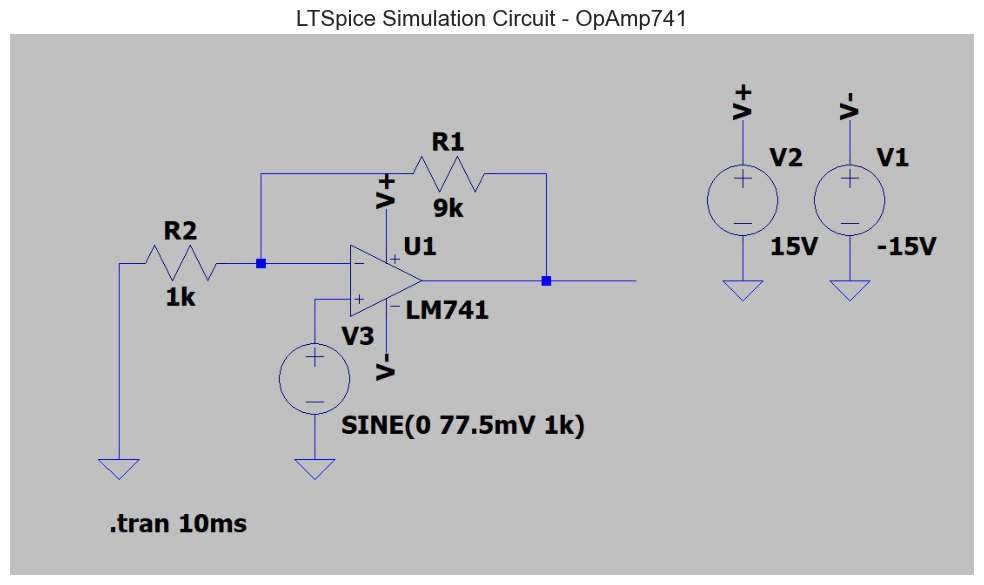

In [102]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LTSPICE_CIRCUIT_AVAILABLE = True
img_path = '../images/OpAmp741.jpg'  # change string to name of LTspice image
img_title = "LTSpice Simulation Circuit - OpAmp741" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

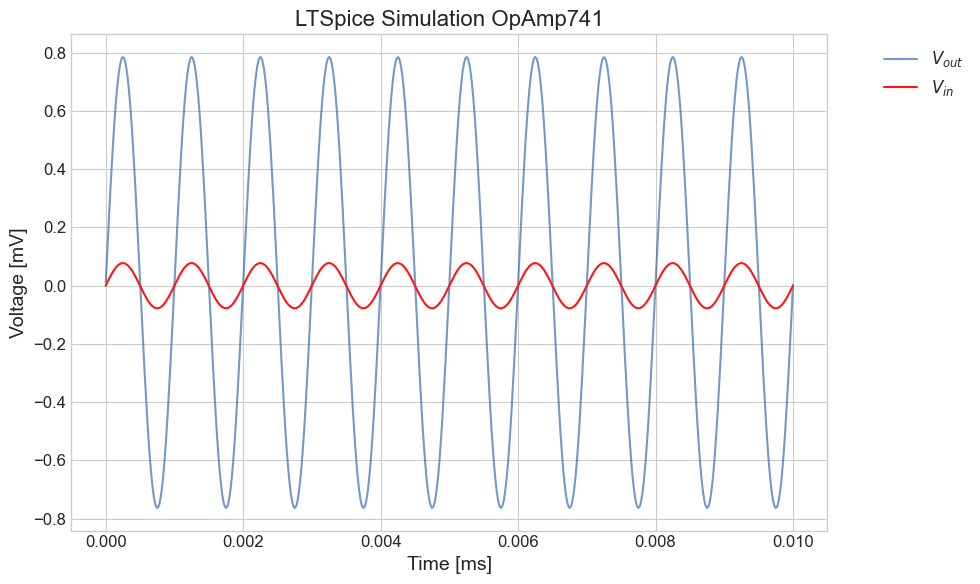

In [103]:
# For Plotting Simulation Values

from components.data_visualizing import plot_sim_data
# Function requires 5 arguments, hover cursor to see
PLOT_SIM_DATA = True

pro_data_3 = data_2.copy()
#pro_data_3["time"] = pro_data_3["time"].astype(float)*1e3
#pro_data_3["V(out)"] = pro_data_3["V(out)"].astype(float)*1e3
#pro_data_3["V(vin)"] = pro_data_3["V(vin)"].astype(float)*1e3

if PLOT_SIM_DATA:
     fig, ax = plot_sim_data(
                    pro_data_3,
                    x_label="Time [ms]",
                    y_label="Voltage [mV]",
                    title="LTSpice Simulation OpAmp741",
                    label1="$V_{out}$",
                    label2="$V_{in}$",
                    is_multi=True,
                    color2="#ff1515",
                    color1="#1e5ca99f"
               )

## Task 2.2

**Objective:** The goal is to determine the slew rate of the 741 op-amp by using an inverting amplifier configuration.
The slew rate was determined from the simulation and compared to the one from the datasheet. Also the power bandwidth was determined and compared to the one from the simulation.

According to the datasheet of the μA741 operational amplifier:

$$
\boxed{\text{Slew Rate}_{\text{typical}} = 0.5\ \frac{V}{\mu s}}
$$


**Slew rate fro the simulation**

To calculate the slew rate from a transient simulation:

$$
\text{Slew Rate} = \frac{\Delta V}{\Delta t} = \frac{V_2 - V_1}{t_2 - t_1}
$$

Where:
- $V_1$ and $V_2$ are two voltage points during the linear ramp (typically on a rising or falling edge of the output),
- $t_1$ and $t_2$ are the corresponding time points.




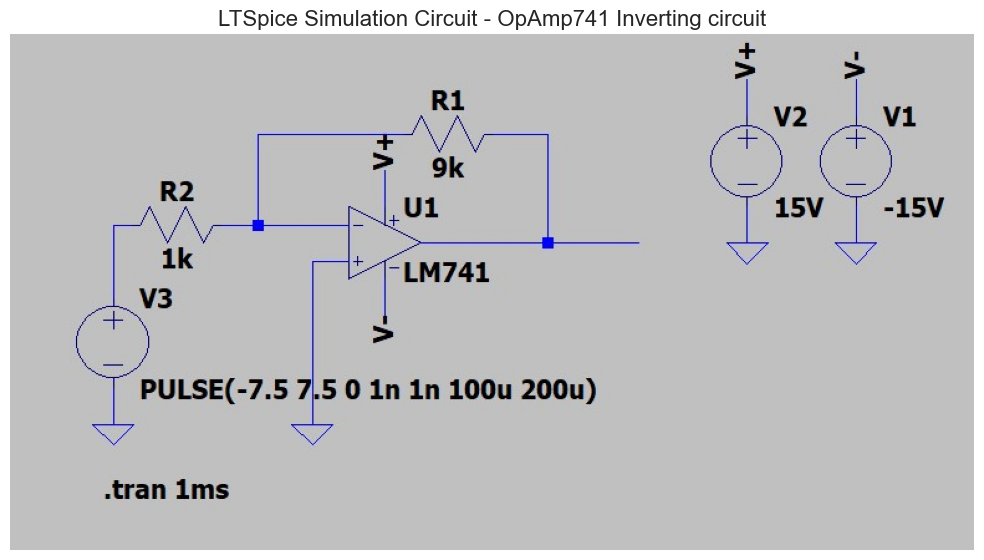

In [104]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LTSPICE_CIRCUIT_AVAILABLE = True
img_path = '../images/OpAmp741.2.jpg'  # change string to name of LTspice image
img_title = "LTSpice Simulation Circuit - OpAmp741 Inverting circuit" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

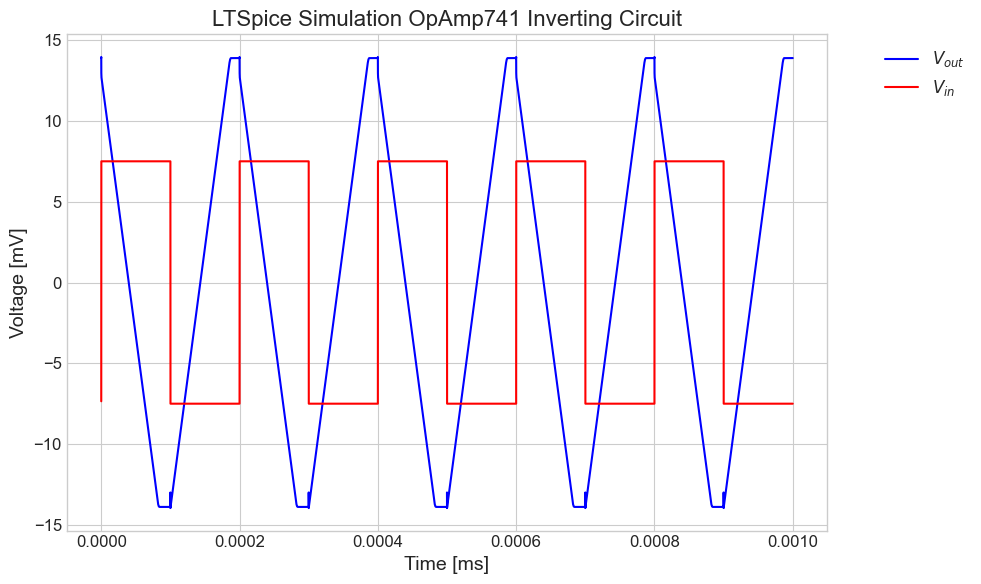

In [105]:
# For Plotting Simulation Values

from components.data_visualizing import plot_sim_data
# Function requires 5 arguments, hover cursor to see
PLOT_SIM_DATA = True

pro_data_4 = data_3.copy()
#pro_data_3["time"] = pro_data_3["time"].astype(float)*1e3
#pro_data_3["V(out)"] = pro_data_3["V(out)"].astype(float)*1e3
#pro_data_3["V(vin)"] = pro_data_3["V(vin)"].astype(float)*1e3

if PLOT_SIM_DATA:
     fig, ax = plot_sim_data(
                    pro_data_4,
                    x_label="Time [ms]",
                    y_label="Voltage [mV]",
                    title="LTSpice Simulation OpAmp741 Inverting Circuit",
                    label1="$V_{out}$",
                    label2="$V_{in}$",
                    is_multi=True,
                    color1='blue',	
                    color2='#FF0000'  # Red color for the second line
               )

**Slew Rate Calculation**

To calculate the slew rate:

$$
\text{Slew Rate} = \frac{U_1 - U_2}{T_1 - T_2}
$$

Substitute the values:

$$
\text{Slew Rate} = \frac{13.85\ \text{V} - (-13.85\ \text{V})}{0.388\ \text{ms} - 0.300\ \text{ms}} = \frac{27.7\ \text{V}}{0.088\ \text{ms}}
$$

Convert milliseconds to microseconds:

$$
\text{Slew Rate} = \frac{27.7\ \text{V}}{88\ \mu\text{s}} \approx \boxed{0.3159\ \frac{V}{\mu s}}
$$

